# Evaluación de Eficiencia en Algoritmos Paralelos de Multiplicación de Matrices: Un Enfoque Comparativo entre Filas por Columnas

Se importan las bibliotecas necesarias para el análisis de datos, visualización y estadísticas.

* **pandas:**  Utilizada para manipulación y análisis de datos.
* **matplotlib.** pyplot: Empleada para la creación de gráficos y visualización de resultados.
* **numpy:**  Proporciona soporte para operaciones matriciales y numéricas eficientes.
* **scipy.** stats.linregress: Se utiliza para realizar análisis de regresión lineal, posiblemente para evaluar tendencias en los datos.

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

La siguiente función realiza la preparación de los datos necesarios para el análisis de tiempos de ejecución de los algoritmos de multiplicación de matrices.

In [ ]:
def read_excecution_time(df):
    """
    Esta función realiza la preparación de datos necesaria para el análisis de tiempos de ejecución.
    
    Parámetros:
    - df: DataFrame que contiene los datos de ejecución
    
    Retorna:
    - DataFrame modificado con columnas renombradas y tipos de datos adecuados.
    """
    # Renombrar columnas para mayor claridad
    df = df.rename(columns={'Column1': 'N', 'Column2': 'CORES', 'Column3': 'TIEMPO_EJECUCION', 'Source.Name': 'EJECUCION'})

    # Eliminar ':' de la columna 'CORES' y convertir a tipo entero
    df['CORES'] = df['CORES'].str.replace(':','')
    df['CORES'] = df['CORES'].astype(int)

    # Convertir la columna 'TIEMPO_EJECUCION' a tipo numérico
    df['TIEMPO_EJECUCION'] = pd.to_numeric(df['TIEMPO_EJECUCION'])  
    return df 

A continuación, se leen los tiempos de ejecución de los algoritmos de multiplicación de matrices en diferentes máquinas y aplican la función ```read_excecution_time``` para preparar los datos. Los DataFrames resultantes (por cada combinación de algoritmo y máquina) están listos para su posterior análisis y visualización.

In [2]:
# Lectura de archivos y preparación de datos para algoritmo filas x columnas en máquinas 1, 2 y 3
FilasxColumnasM1 = pd.read_excel('FilasxColumnasL2.xlsx', sheet_name='cad2')
FilasxColumnasM1 = read_excecution_time(FilasxColumnasM1)

FilasxColumnasM2 = pd.read_excel('FilasxColumnasL2M2.xlsx', sheet_name='cad2 (2)')
FilasxColumnasM2 = read_excecution_time(FilasxColumnasM2)

FilasxColumnasM3 = pd.read_excel('FilasxColumnasL2M3.xlsx', sheet_name='cad2 (2)')
FilasxColumnasM3 = read_excecution_time(FilasxColumnasM3)

# Lectura de archivos y preparación de datos para algoritmo filas x filas en máquinas 1, 2 y 3
FilasxFilasM1 = pd.read_excel('FilasxFilasL2.xlsx', sheet_name='cad6 (2)')
FilasxFilasM1 = read_excecution_time(FilasxFilasM1)

FilasxFilasM2 = pd.read_excel('FilasxFilasL2M2.xlsx', sheet_name='cad6 (2)')
FilasxFilasM2 = read_excecution_time(FilasxFilasM2)

FilasxFilasM3 = pd.read_excel('FilasxFilasL2M3.xlsx', sheet_name='cad6 (2)')
FilasxFilasM3 = read_excecution_time(FilasxFilasM3)

A continuación, calculamos los tiempos promedio por cada combinación de los parámetros ```N``` y ```CORES```. Esto lo haremos agrupando por cada combinación.

In [3]:
# Cálculo de tiempos promedio para el algoritmo filas x columnas en máquinas 1, 2 y 3
FilasxColumnasM1_promedio = FilasxColumnasM1.groupby(['N', 'CORES'], as_index=False)['TIEMPO_EJECUCION'].mean()
FilasxColumnasM2_promedio = FilasxColumnasM2.groupby(['N', 'CORES'], as_index=False)['TIEMPO_EJECUCION'].mean()
FilasxColumnasM3_promedio = FilasxColumnasM3.groupby(['N', 'CORES'], as_index=False)['TIEMPO_EJECUCION'].mean()

# Cálculo de tiempos promedio para el algoritmo filas x filas en máquinas 1, 2 y 3
FilasxFilasM1_promedio = FilasxFilasM1.groupby(['N', 'CORES'], as_index=False)['TIEMPO_EJECUCION'].mean()
FilasxFilasM2_promedio = FilasxFilasM2.groupby(['N', 'CORES'], as_index=False)['TIEMPO_EJECUCION'].mean()
FilasxFilasM3_promedio = FilasxFilasM3.groupby(['N', 'CORES'], as_index=False)['TIEMPO_EJECUCION'].mean()

Ajustamos los campos ```CORES``` y ```TIEMPO_EJECUCION```, de modo que la cantidad de cores quede como un valor mayor a 1 y el tiempo de ejecución esté expresado en segundos.

In [ ]:
def ajustar_numero_cores(cantidad_cores):
    """
    Ajusta el número de núcleos, probablemente para incluir el caso con 1 núcleo adicional.
    
    Parámetros:
    - cantidad_cores: Número original de núcleos.
    
    Retorna:
    - Número de núcleos ajustado.
    """
    return cantidad_cores + 1

def milisegundos_a_segundos(milisegundos):
    """
    Convierte el tiempo de milisegundos a segundos.
    
    Parámetros:
    - milisegundos: Tiempo en milisegundos.
    
    Retorna:
    - Tiempo en segundos.
    """
    segundos = milisegundos / 1000
    return segundos

Se aplican las funciones de ajuste a las columnas relevantes en los DataFrames de tiempos promedio. Específicamente, se ajusta el número de núcleos con la función ```ajustar_numero_cores``` y se convierte el tiempo de ejecución de milisegundos a segundos con la función ```milisegundos_a_segundos```.

In [4]:
# Aplicar funciones de ajuste a los DataFrames de tiempos promedio
FilasxColumnasM1_promedio['CORES'] = FilasxColumnasM1_promedio['CORES'].apply(ajustar_numero_cores)
FilasxColumnasM1_promedio['TIEMPO_EJECUCION'] = FilasxColumnasM1_promedio['TIEMPO_EJECUCION'].apply(milisegundos_a_segundos)
FilasxColumnasM2_promedio['CORES'] = FilasxColumnasM2_promedio['CORES'].apply(ajustar_numero_cores)
FilasxColumnasM2_promedio['TIEMPO_EJECUCION'] = FilasxColumnasM2_promedio['TIEMPO_EJECUCION'].apply(milisegundos_a_segundos)
FilasxColumnasM3_promedio['CORES'] = FilasxColumnasM3_promedio['CORES'].apply(ajustar_numero_cores)
FilasxColumnasM3_promedio['TIEMPO_EJECUCION'] = FilasxColumnasM3_promedio['TIEMPO_EJECUCION'].apply(milisegundos_a_segundos)
FilasxFilasM1_promedio['CORES'] = FilasxFilasM1_promedio['CORES'].apply(ajustar_numero_cores)
FilasxFilasM1_promedio['TIEMPO_EJECUCION'] = FilasxFilasM1_promedio['TIEMPO_EJECUCION'].apply(milisegundos_a_segundos)
FilasxFilasM2_promedio['CORES'] = FilasxFilasM2_promedio['CORES'].apply(ajustar_numero_cores)
FilasxFilasM2_promedio['TIEMPO_EJECUCION'] = FilasxFilasM2_promedio['TIEMPO_EJECUCION'].apply(milisegundos_a_segundos)
FilasxFilasM3_promedio['CORES'] = FilasxFilasM3_promedio['CORES'].apply(ajustar_numero_cores)
FilasxFilasM3_promedio['TIEMPO_EJECUCION'] = FilasxFilasM3_promedio['TIEMPO_EJECUCION'].apply(milisegundos_a_segundos)

Con lo anterior, podemos calcular las medidas de eficiencia escogidas previamente para el experimento, es decir, el **Speed Up** y la **eficiencia**. Que recordemos, se calculan de la siguiente manera:

$$
Speedup = \frac{T_{1}}{T_{n}},
$$

donde $T_{1}$ es el tiempo de ejecución con un solo procesador y $T_{n}$ es el tiempo de ejecución utilizando n procesadores; y

$$
Eficiencia = \frac{Speedup}{\# CORES}
$$

In [ ]:
def calculate_speedup_and_efficiency(df):
    """
    Calcula los valores de speed-up y eficiencia para cada configuración específica de tamaño de matriz y número de núcleos.
    
    Parámetros:
    - df: DataFrame con datos de tiempo de ejecución y configuración.
    
    Retorna:
    - DataFrame con columnas adicionales 'SPEED_UP' y 'EFICIENCIA'.
    """
    secuencial_time = df.groupby('N')['TIEMPO_EJECUCION'].min()

    speed_up_values = []
    efficiency_values = []

    for n_value in df['N'].unique():
        secuencial_time = df[df['N'] == n_value]['TIEMPO_EJECUCION'].min()
        for index, row in df.iterrows():
            if row['N'] == n_value:
                speed_up = secuencial_time / row['TIEMPO_EJECUCION']
                efficiency = speed_up / row['CORES']
                speed_up_values.append(speed_up)
                efficiency_values.append(efficiency)
    
    df['SPEED_UP'] = speed_up_values
    df['EFICIENCIA'] = efficiency_values
    return df

Se aplican la función ```calculate_speedup_and_efficiency``` a los DataFrames de tiempos promedio para calcular los valores de speed-up y eficiencia. Estos nuevos valores proporcionan información adicional sobre el rendimiento de los algoritmos en comparación con la ejecución secuencial.

In [5]:
FilasxColumnasM1_promedio = calculate_speedup_and_efficiency(FilasxColumnasM1_promedio)
FilasxColumnasM2_promedio = calculate_speedup_and_efficiency(FilasxColumnasM2_promedio)
FilasxColumnasM3_promedio = calculate_speedup_and_efficiency(FilasxColumnasM3_promedio)
FilasxFilasM1_promedio = calculate_speedup_and_efficiency(FilasxFilasM1_promedio)
FilasxFilasM2_promedio = calculate_speedup_and_efficiency(FilasxFilasM2_promedio)
FilasxFilasM3_promedio = calculate_speedup_and_efficiency(FilasxFilasM3_promedio)

Se realiza la comparación de resultados entre los tiempos promedio de ejecución y las métricas de rendimiento (speed-up y eficiencia) para los algoritmos de multiplicación de matrices utilizando el enfoque de filas por columnas y filas por filas. Se realiza una fusión interna (inner merge) entre los DataFrames correspondientes a las máquinas 1, 2 y 3.

Los DataFrames resultantes (```comparacion_prueba1```, ```comparacion_prueba2```, ```comparacion_prueba3```) contendrán información combinada sobre los tiempos promedio y las métricas de rendimiento para ambas estrategias de multiplicación de matrices, permitiendo una comparación directa entre ellas.

In [ ]:
# Comparación de resultados para la prueba 1
comparacion_prueba1 = pd.merge(left=FilasxColumnasM1_promedio, right=FilasxFilasM1_promedio, how='inner', on=['N', 'CORES'])

# Comparación de resultados para la prueba 2
comparacion_prueba2 = pd.merge(left=FilasxColumnasM2_promedio, right=FilasxFilasM2_promedio, how='inner', on=['N', 'CORES'])

# Comparación de resultados para la prueba 3
comparacion_prueba3 = pd.merge(left=FilasxColumnasM3_promedio, right=FilasxFilasM3_promedio, how='inner', on=['N', 'CORES'])

Se genera un gráfico que compara el speed-up de los algoritmos de multiplicación de matrices utilizando el enfoque de filas por columnas y filas por filas en tres máquinas diferentes. Cada subgráfico representa una máquina, y dentro de cada subgráfico, se comparan los speed-up para diferentes tamaños de matriz (N). Los puntos de datos están conectados por líneas para visualizar tendencias.

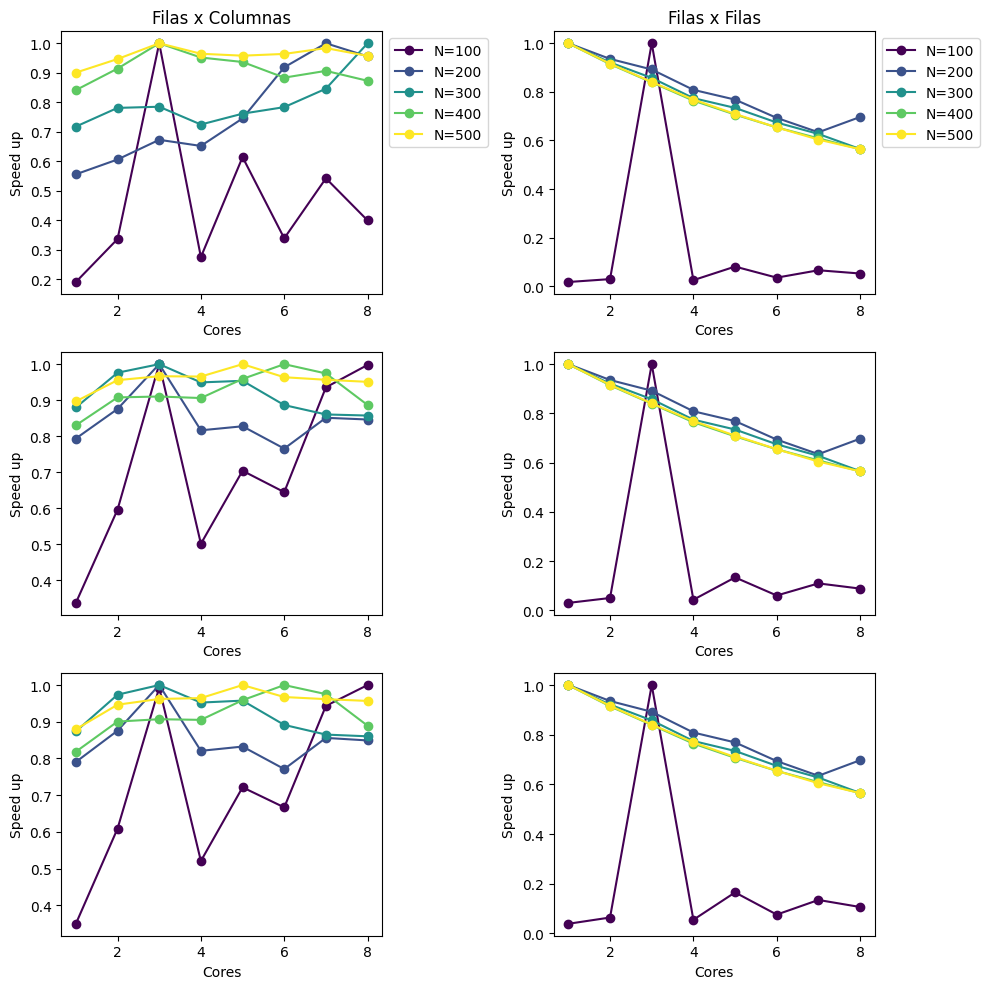

In [24]:
# Paleta de colores
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Crear subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Definir colores
colors = plt.cm.viridis(np.linspace(0, 1, len(comparacion_prueba1['N'].unique())))

for i, n_value in enumerate(comparacion_prueba1['N'].unique()):
    color = colors[i % len(colors)]  # Seleccionar un color de la paleta
    
    # Gráficas sobre la maquina 1
    axs[0, 0].plot(comparacion_prueba1[comparacion_prueba1['N'] == n_value]['CORES'], comparacion_prueba1[comparacion_prueba1['N'] == n_value]['SPEED_UP_x'], marker='o', label=f'N={n_value}', color=color)
    axs[0, 1].plot(comparacion_prueba1[comparacion_prueba1['N'] == n_value]['CORES'], comparacion_prueba1[comparacion_prueba1['N'] == n_value]['SPEED_UP_y'], marker='o', label=f'N={n_value}', color=color)
    
    # Gráficas sobre la maquina 2
    axs[1, 0].plot(comparacion_prueba2[comparacion_prueba2['N'] == n_value]['CORES'], comparacion_prueba2[comparacion_prueba2['N'] == n_value]['SPEED_UP_x'], marker='o', label=f'N={n_value}', color=color)
    axs[1, 1].plot(comparacion_prueba2[comparacion_prueba2['N'] == n_value]['CORES'], comparacion_prueba2[comparacion_prueba2['N'] == n_value]['SPEED_UP_y'], marker='o', label=f'N={n_value}', color=color)
    
    # Gráficas sobre la maquina 3
    axs[2, 0].plot(comparacion_prueba3[comparacion_prueba3['N'] == n_value]['CORES'], comparacion_prueba3[comparacion_prueba3['N'] == n_value]['SPEED_UP_x'], marker='o', label=f'N={n_value}', color=color)
    axs[2, 1].plot(comparacion_prueba3[comparacion_prueba3['N'] == n_value]['CORES'], comparacion_prueba3[comparacion_prueba3['N'] == n_value]['SPEED_UP_y'], marker='o', label=f'N={n_value}', color=color)

# Añadir etiquetas y títulos
for ax in axs.flat:
    ax.set(xlabel='Cores', ylabel='Speed up')
axs[0, 0].set_title('Filas x Columnas')
axs[0, 1].set_title('Filas x Filas')

# Añadir leyenda
axs[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

Se genera un gráfico que compara los tiempos de ejecución de los algoritmos de multiplicación de matrices utilizando el enfoque de filas por columnas y filas por filas en tres máquinas diferentes. Cada subgráfico representa una máquina, y dentro de cada subgráfico, se comparan los tiempos de ejecución para diferentes tamaños de matriz (N). Los puntos de datos están conectados por líneas para visualizar tendencias.

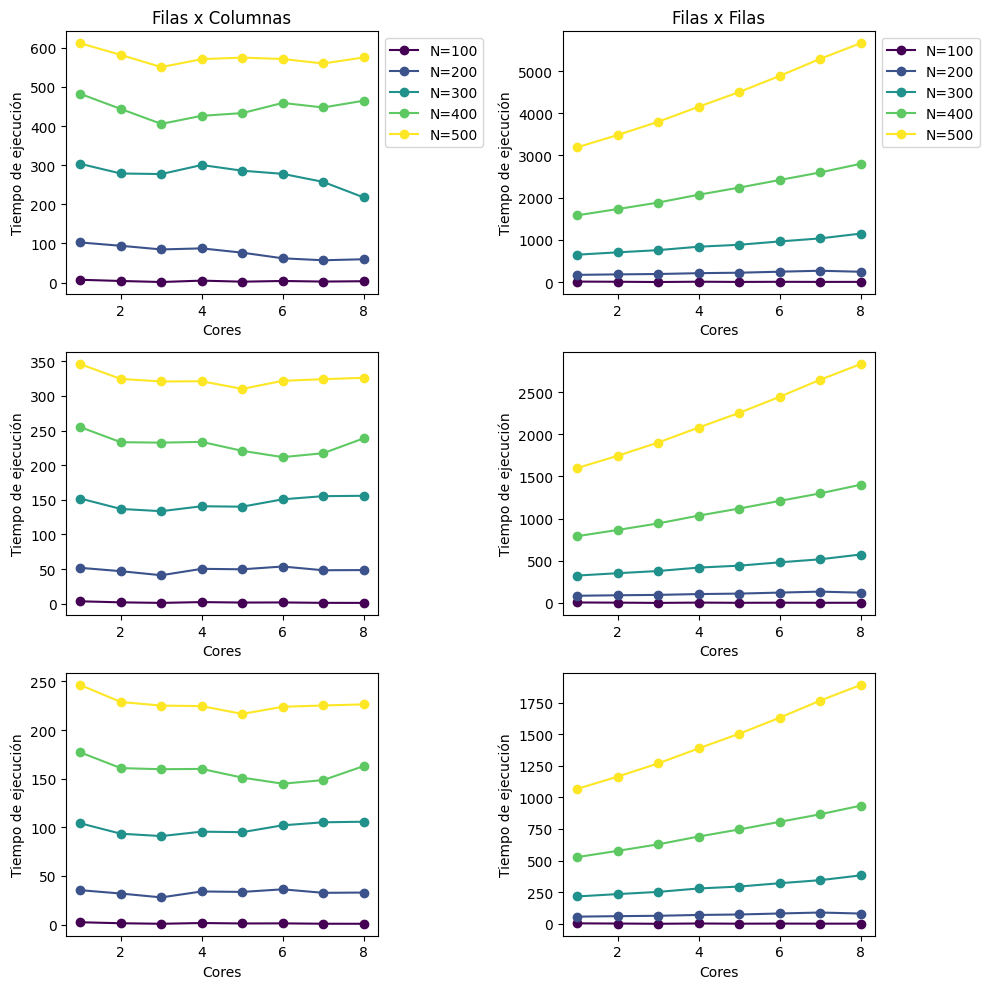

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Definir colores
colors = plt.cm.viridis(np.linspace(0, 1, len(comparacion_prueba2['N'].unique())))

for i, n_value in enumerate(comparacion_prueba2['N'].unique()):
    color = colors[i % len(colors)]  # Seleccionar un color de la paleta
    
    # Gráficas sobre la maquina 1
    axs[0, 0].plot(comparacion_prueba1[comparacion_prueba1['N'] == n_value]['CORES'], comparacion_prueba1[comparacion_prueba1['N'] == n_value]['TIEMPO_EJECUCION_x'], marker='o', label=f'N={n_value}', color=color)
    axs[0, 1].plot(comparacion_prueba1[comparacion_prueba1['N'] == n_value]['CORES'], comparacion_prueba1[comparacion_prueba1['N'] == n_value]['TIEMPO_EJECUCION_y'], marker='o', label=f'N={n_value}', color=color)
    
    # Gráficas sobre la maquina 2
    axs[1, 0].plot(comparacion_prueba2[comparacion_prueba2['N'] == n_value]['CORES'], comparacion_prueba2[comparacion_prueba2['N'] == n_value]['TIEMPO_EJECUCION_x'], marker='o', label=f'N={n_value}', color=color)
    axs[1, 1].plot(comparacion_prueba2[comparacion_prueba2['N'] == n_value]['CORES'], comparacion_prueba2[comparacion_prueba2['N'] == n_value]['TIEMPO_EJECUCION_y'], marker='o', label=f'N={n_value}', color=color)
    
    # Gráficas sobre la maquina 3
    axs[2, 0].plot(comparacion_prueba3[comparacion_prueba3['N'] == n_value]['CORES'], comparacion_prueba3[comparacion_prueba3['N'] == n_value]['TIEMPO_EJECUCION_x'], marker='o', label=f'N={n_value}', color=color)
    axs[2, 1].plot(comparacion_prueba3[comparacion_prueba3['N'] == n_value]['CORES'], comparacion_prueba3[comparacion_prueba3['N'] == n_value]['TIEMPO_EJECUCION_y'], marker='o', label=f'N={n_value}', color=color)

# Añadir etiquetas y títulos
for ax in axs.flat:
    ax.set(xlabel='Cores', ylabel='Tiempo de ejecución')
axs[0, 0].set_title('Filas x Columnas')
axs[0, 1].set_title('Filas x Filas')

# Añadir leyenda
axs[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

Se genera un gráfico que compara la eficiencia de los algoritmos de multiplicación de matrices utilizando el enfoque de filas por columnas y filas por filas en tres máquinas diferentes. Cada subgráfico representa una máquina, y dentro de cada subgráfico, se comparan las eficiencias para diferentes tamaños de matriz (N). Los puntos de datos están conectados por líneas para visualizar tendencias.

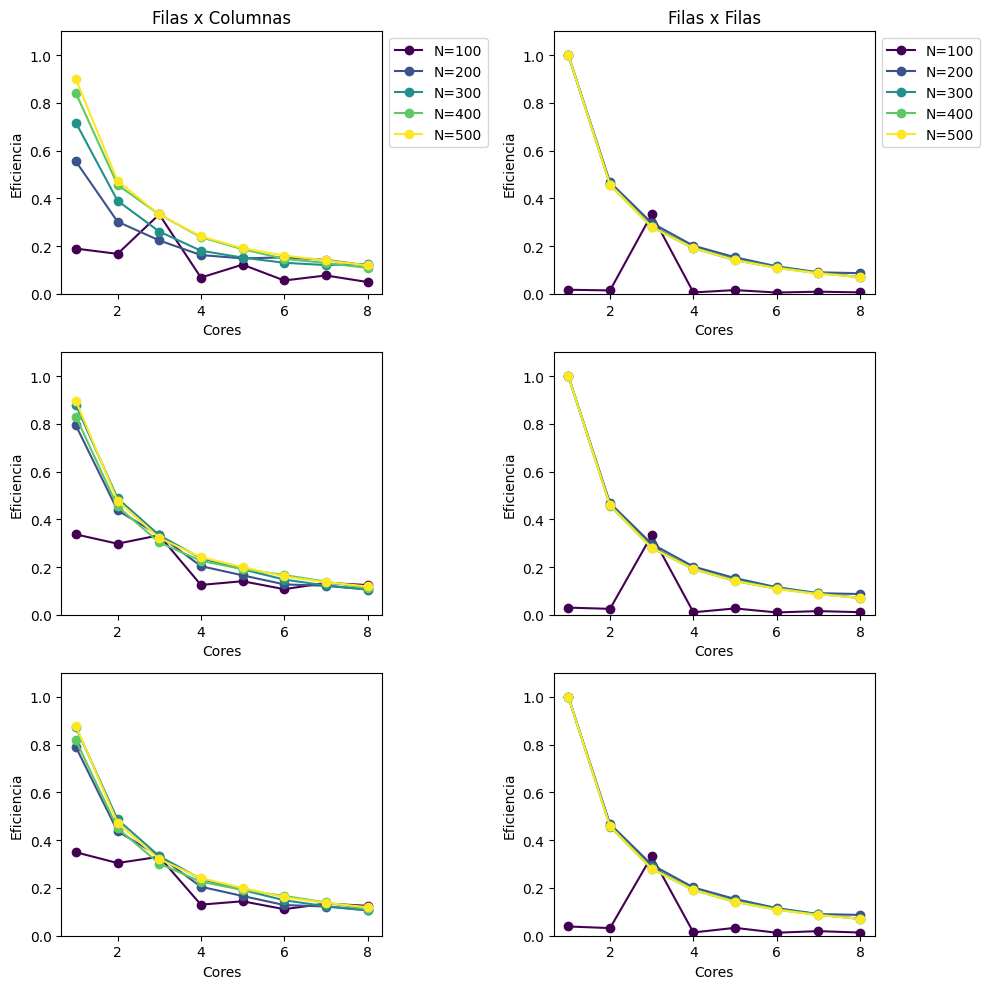

In [28]:
# Rango de ejes
axis_range = [0, 1.1]

# Crear subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Definir colores
colors = plt.cm.viridis(np.linspace(0, 1, len(comparacion_prueba1['N'].unique())))

for i, n_value in enumerate(comparacion_prueba1['N'].unique()):
    color = colors[i % len(colors)]  # Seleccionar un color de la paleta
    
    # Gráficas sobre la maquina 1
    axs[0, 0].plot(comparacion_prueba1[comparacion_prueba1['N'] == n_value]['CORES'], comparacion_prueba1[comparacion_prueba1['N'] == n_value]['EFICIENCIA_x'], marker='o', label=f'N={n_value}', color=color)
    axs[0, 1].plot(comparacion_prueba1[comparacion_prueba1['N'] == n_value]['CORES'], comparacion_prueba1[comparacion_prueba1['N'] == n_value]['EFICIENCIA_y'], marker='o', label=f'N={n_value}', color=color)
    
    # Gráficas sobre la maquina 2
    axs[1, 0].plot(comparacion_prueba2[comparacion_prueba2['N'] == n_value]['CORES'], comparacion_prueba2[comparacion_prueba2['N'] == n_value]['EFICIENCIA_x'], marker='o', label=f'N={n_value}', color=color)
    axs[1, 1].plot(comparacion_prueba2[comparacion_prueba2['N'] == n_value]['CORES'], comparacion_prueba2[comparacion_prueba2['N'] == n_value]['EFICIENCIA_y'], marker='o', label=f'N={n_value}', color=color)
    
    # Gráficas sobre la maquina 3
    axs[2, 0].plot(comparacion_prueba3[comparacion_prueba3['N'] == n_value]['CORES'], comparacion_prueba3[comparacion_prueba3['N'] == n_value]['EFICIENCIA_x'], marker='o', label=f'N={n_value}', color=color)
    axs[2, 1].plot(comparacion_prueba3[comparacion_prueba3['N'] == n_value]['CORES'], comparacion_prueba3[comparacion_prueba3['N'] == n_value]['EFICIENCIA_y'], marker='o', label=f'N={n_value}', color=color)

# Añadir etiquetas y títulos
for ax in axs.flat:
    ax.set(xlabel='Cores', ylabel='Eficiencia')
axs[0, 0].set_title('Filas x Columnas')
axs[0, 1].set_title('Filas x Filas')

# Aplicar rango de ejes
for ax in axs.flat:
    ax.set_ylim(axis_range)

# Añadir leyenda
axs[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

## Combinación de Datos para Comparación de Estrategias de Multiplicación de Matrices

Se combinan los datos de tiempos de ejecución promedio para las estrategias de multiplicación de matrices, específicamente entre las estrategias de filas por columnas y filas por filas. Las combinaciones se realizan para tres conjuntos de datos diferentes correspondientes a tres máquinas distintas.

In [12]:
# Combinar datos de tiempos de ejecución promedio para las estrategias de filas por columnas y filas por filas
comparacion_prueba1 = pd.merge(left=FilasxColumnasM1_promedio, right=FilasxFilasM1_promedio, how='inner', on=['N', 'CORES'])
comparacion_prueba2 = pd.merge(left=FilasxColumnasM2_promedio, right=FilasxFilasM2_promedio, how='inner', on=['N', 'CORES'])
comparacion_prueba3 = pd.merge(left=FilasxColumnasM3_promedio, right=FilasxFilasM3_promedio, how='inner', on=['N', 'CORES'])

Se define la función ```graph_linear_regression``` que genera un gráfico de regresión lineal para comparar la eficiencia entre las estrategias de multiplicación de matrices (filas por columnas y filas por filas) para diferentes valores de N (tamaño de la matriz). La función utiliza la biblioteca ```matplotlib``` para crear el gráfico y la función ```linregress``` de ```scipy.stats``` para calcular la regresión lineal.

In [33]:
def graph_linear_regresion(df, field='EFICIENCIA'):
    # Calcular la regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(comparacion_prueba1[f'{field}_x'].values, comparacion_prueba1[f'{field}_y'].values)
    modelo_lineal = np.poly1d([slope, intercept])
    predicciones = modelo_lineal(comparacion_prueba1[f'{field}_x'].values)
    r_cuadrado = r_value ** 2

    # Crear el gráfico
    fig, ax = plt.subplots()

    # Agregar puntos de dispersión para cada valor de N
    for n_value in comparacion_prueba1['N'].unique():
        ax.scatter(comparacion_prueba1[comparacion_prueba1['N'] == n_value][f'{field}_x'].values,
                   comparacion_prueba1[comparacion_prueba1['N'] == n_value][f'{field}_y'].values,
                   label=f'N={n_value}')

    # Agregar la línea de identidad
    ax.plot(comparacion_prueba1[f'{field}_x'].values, predicciones, linestyle='--', color='black', label='Identidad')

    # Ajustar diseño
    ax.set_title('Gráfico de eficiencia para diferentes valores de N con identidad')
    ax.legend()
    plt.xlabel(f'{field} - Filas por columnas')
    plt.ylabel(f'{field} - Filas por filas')

    # Mostrar estadísticas
    print('R2:', r_cuadrado)
    print('P valor:', p_value)

    # Mostrar el gráfico
    plt.show()

El gráfico incluirá puntos de dispersión para cada valor de N y trazará una línea de regresión lineal. Además, se imprimirán estadísticas como el coeficiente de determinación ($R^2$) y el $valor p$ asociados con la regresión lineal.

R2: 0.9176514279099574
P valor: 3.3446346589037073e-22


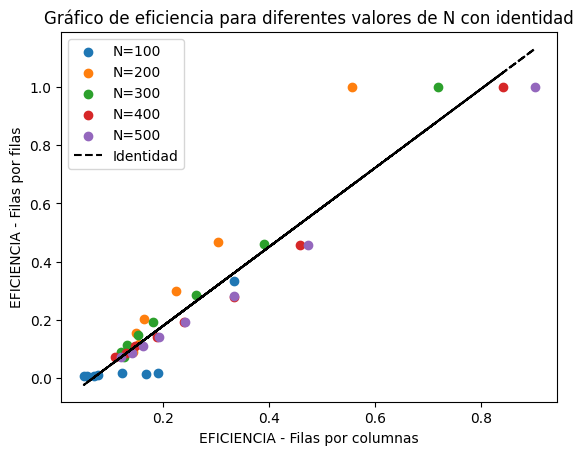

In [34]:
# Variables a comparar: EFICIENCIA, TIEMPO_EJECUCION, SPEED_UP
graph_linear_regresion(comparacion_prueba1, "EFICIENCIA")

R2: 0.9176514279099574
P valor: 3.3446346589037073e-22


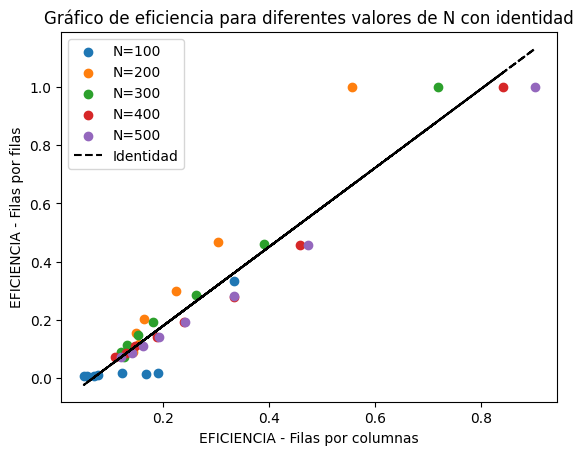

In [35]:
graph_linear_regresion(comparacion_prueba2, "EFICIENCIA")

R2: 0.9176514279099574
P valor: 3.3446346589037073e-22


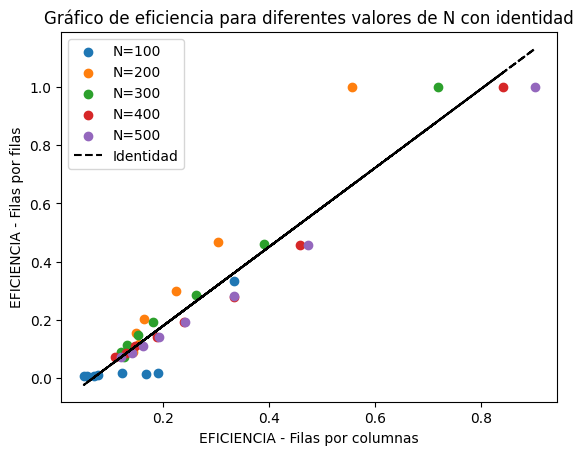

In [36]:
graph_linear_regresion(comparacion_prueba3, "EFICIENCIA")